In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Read Data From Txt File

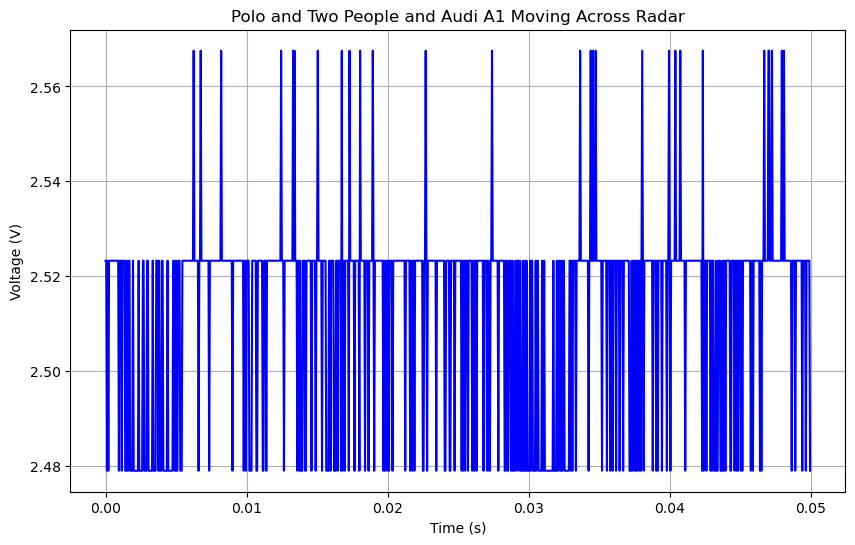

In [15]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/20khzSampling/PersonThenTwoPolos.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data[0:1000], voltage_data[0:1000], color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Polo and Two People and Audi A1 Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()


# Low Pass Filtering the data using a moving average filter

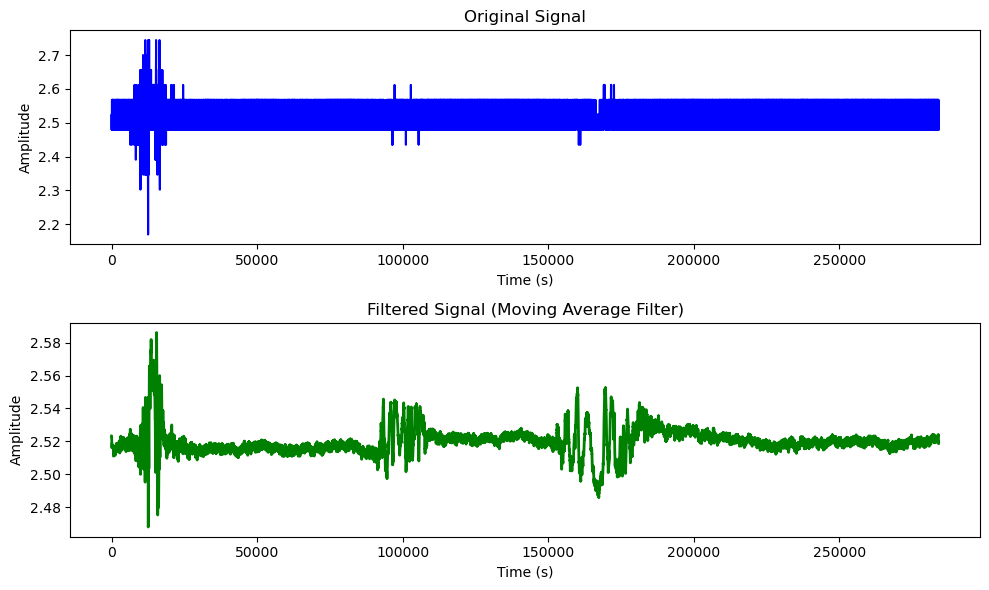

In [16]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in voltage_data]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(voltage_data, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Moving Average Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Isolating Each Target

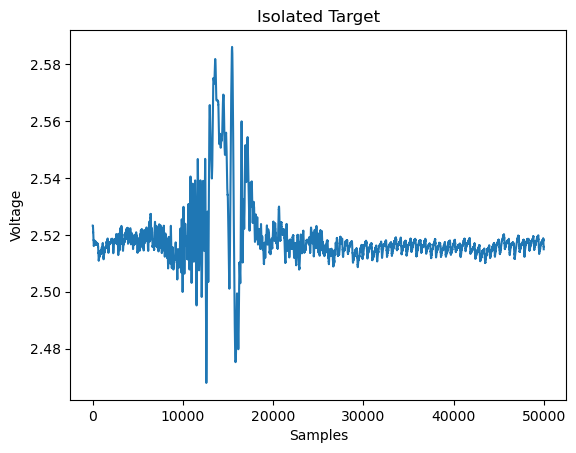

In [17]:
target = np.array(50000)



for i in range(len(filtered_data)):
    if filtered_data[i] > 2.5 and np.sum(filtered_data[i:i+500])/500 > 2.5:
        target = filtered_data[i:50000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()      
        



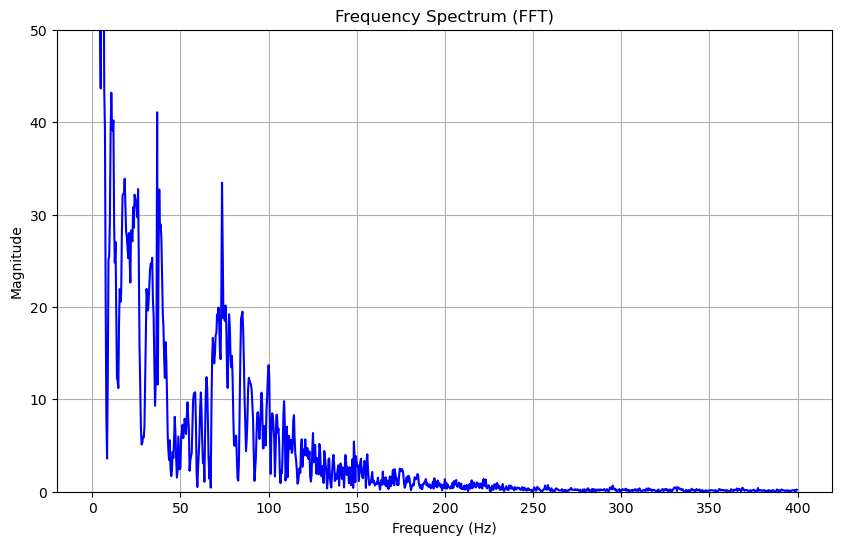

In [18]:
# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2][0:1000], fft_magnitude[:len(fft_magnitude) // 2][0:1000], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,50)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


# Removing DC Shift from Target

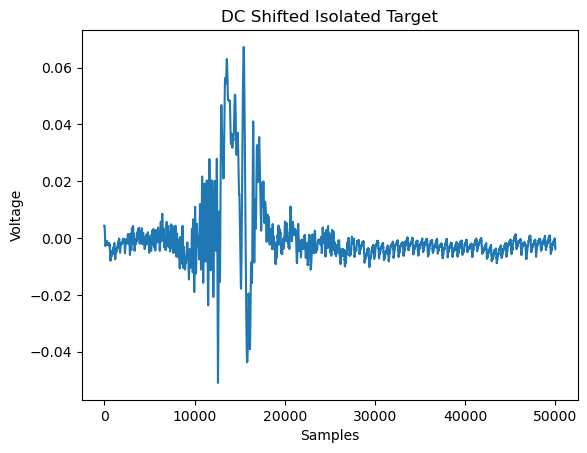

In [19]:
target = target - np.sum(target)/len(target) # Getting rid of DC shift by subtracting the average from it 


plt.plot(target)
plt.title('DC Shifted Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()

# Absolute Value of Signal

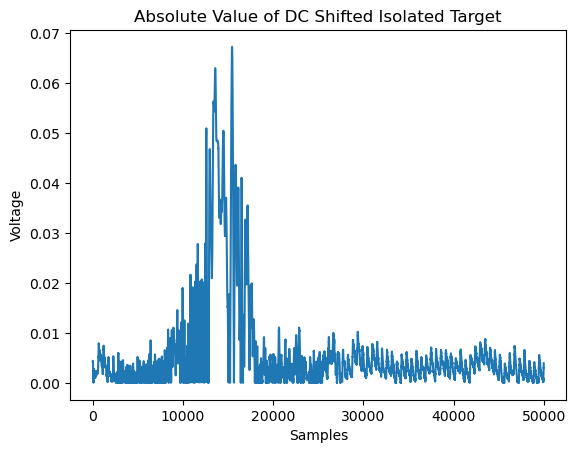

In [20]:
target = abs(target)

plt.plot(target)
plt.title('Absolute Value of DC Shifted Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()